# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
import urllib


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
lat_range

(-90, 90)

In [5]:
lng_range

(-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#Use the python zip function to weave the lats and longs together. (Like a zipper!)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [7]:
cities

['chapais',
 'kashirskoye',
 'sangar',
 'vaini',
 'mar del plata',
 'port alfred',
 'busselton',
 'bredasdorp',
 'la grande',
 'asau',
 'richards bay',
 'ust-kuyga',
 'mataura',
 'longyearbyen',
 'new norfolk',
 'norman wells',
 'liwale',
 'margate',
 'palabuhanratu',
 'kapaa',
 'port hedland',
 'albany',
 'hilo',
 'clarksburg',
 'amderma',
 'cape town',
 'butaritari',
 'tuatapere',
 'komsomolskiy',
 'ushuaia',
 'atuona',
 'searcy',
 'thompson',
 'sozopolis',
 'hohhot',
 'kavaratti',
 'geraldton',
 'georgetown',
 'avarua',
 'lakhdenpokhya',
 'saint george',
 'mbaiki',
 'grindavik',
 'mys shmidta',
 'saldanha',
 'jamestown',
 'mezen',
 'rikitea',
 'griffith',
 'yellowknife',
 'taltal',
 'punta arenas',
 'east london',
 'pacific grove',
 'oranjemund',
 'flinders',
 'port hardy',
 'clyde river',
 'new port richey',
 'sentyabrskiy',
 'saint-gaudens',
 'sibu',
 'dauphin',
 'koygorodok',
 'hamilton',
 'kitimat',
 'jalu',
 'isangel',
 'esperance',
 'guerrero negro',
 'port elizabeth',
 'arrai

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Technically I think you taught us to keep this in a config file, seperate from the python script, but
#I worry about my github repos being disorganized and a config file getting lost. Also, it's a free service.
api_key = "05df799b07c414da7d75996216187876"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Create counters
number_of_cities = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        number_of_cities = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    number_of_cities += 1

    # Building my API requests as a try/except block
    
    try:
        #Using the JSON module from the requests library (a very powerful library!)
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "longitude": city_longitude, 
                          "Maximum Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #except chunk of the try/except block
    except:
        print("Data Load Did Not Work Out.")
        pass
              
print("City Data Loaded.")

Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Work Out.
Data Load Did Not Wo

In [1]:
#Admittedly, this approach to logging the request parsing is totally wrong, but I got the 
#data formatted for loading into a csv and a pandas dataframe.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head(2)

,City,Cloudiness,Country,Date,Humidity,Latitude,Maximum Temp,Wind Speed,longitude
0,chapais,90,CA,1567997283,75,49.78,46.4,10.29,-74.86
1,kashirskoye,0,RU,1567997283,77,51.42,59.0,2.44,39.61


In [22]:
# Extract relevant fields from the data frame
lats = city_data_pd["Latitude"]
max_temps = city_data_pd["Maximum Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [29]:
#Export to CSV file.
export_csv = city_data_pd.to_csv ('output.csv', index = None, header=True) 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

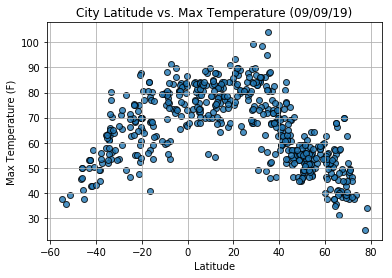

In [31]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x")) #Title, plus datetime, per instructions
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save the visualization
plt.savefig("latitude_by_maximum_temp.png")

# Show the visualization in the Jupyter console to make sure that what you saved makes sense.
plt.show()

#### Latitude vs. Humidity Plot

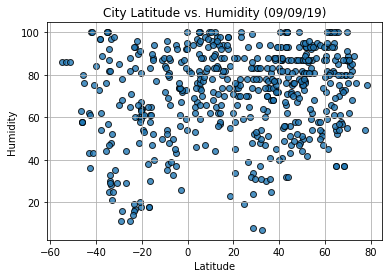

In [45]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latitude_by_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

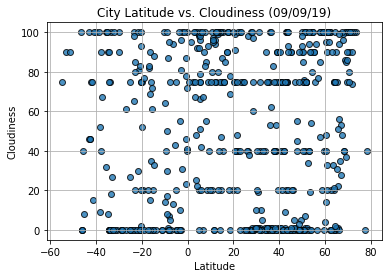

In [44]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latitude__by_cloudliness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

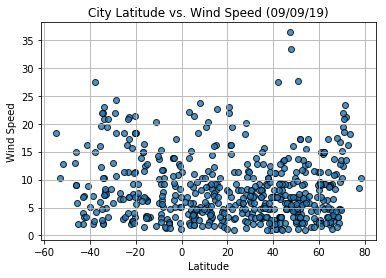

In [46]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latitude_by_windspeed.png")

plt.show()